In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1

In [2]:
Sig_Eqs = pd.read_csv(r'D:\Sustech\研究生\课程\Environmental programming\ESE5023_Assignments_12232269\Assignment 02\earthquakes-2023-10-25_19-11-03_+0800.tsv', sep='\t')
Sig_Eqs = Sig_Eqs[['Year','Mo','Dy','Hr','Mn','Sec','Location Name','Mag','Total Deaths']]

## 1.1

In [55]:
Sig_Eqs1 = Sig_Eqs[['Location Name','Total Deaths']]
Sig_Eqs1 = Sig_Eqs1.dropna(how='any').reset_index(drop=True)
Sig_Eqs1

,Location Name,Total Deaths
0,TURKMENISTAN: W,1.0
1,GREECE: EUBOEA,2500.0
2,CHINA: GANSU PROVINCE,760.0
3,CHINA: SHANDONG PROVINCE,6000.0
4,ISRAEL: PALESTINE,30000.0
...,...,...
1975,"COLOMBIA: BOGOTA, BOYACA, CUNDINAMARCA, META,",2.0
1976,"MOROCCO: MARRAKECH, SAFI",2946.0
1977,AFGHANISTAN: HERAT,1480.0
1978,AFGHANISTAN: HERAT,3.0


In [59]:
Sig_Eqs2 = pd.DataFrame(Sig_Eqs1['Location Name'].str.split(':',1).tolist(),
                       columns=['Country','City'])
Sig_Eqs3 = pd.concat([Sig_Eqs2['Country'],Sig_Eqs1['Total Deaths']],axis=1)

C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_16440\1113850481.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Sig_Eqs2 = pd.DataFrame(Sig_Eqs1['Location Name'].str.split(':',1).tolist(),


In [66]:
result1 = Sig_Eqs3.groupby(['Country']).sum().sort_values('Total Deaths',ascending=False)

In [68]:
print(result1[0:10])

            Total Deaths
Country                 
CHINA          2041929.0
TURKEY          918430.0
IRAN            742607.0
ITALY           422679.0
SYRIA           367700.0
JAPAN           355081.0
HAITI           323776.0
AZERBAIJAN      310119.0
INDONESIA       282498.0
ARMENIA         189000.0


## 1.2

In [70]:
Sig_Eqs4 = Sig_Eqs[['Year','Mag']]
Sig_Eqs4 = Sig_Eqs4.dropna(how='any').reset_index(drop=True)
Sig_Eqs4

,Year,Mag
0,-2150.0,7.3
1,-2000.0,7.1
2,-1250.0,6.5
3,-1050.0,6.2
4,-479.0,7.0
...,...,...
4614,2023.0,6.3
4615,2023.0,6.9
4616,2023.0,4.9
4617,2023.0,6.3


<Axes: xlabel='Year'>

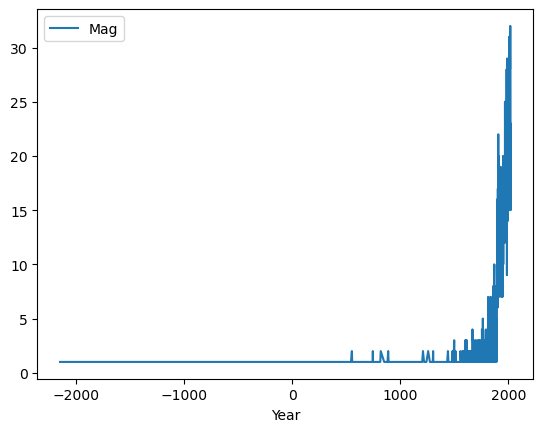

In [73]:
result2 = Sig_Eqs4[Sig_Eqs4['Mag'] > 6].groupby(['Year']).count()
result2.plot()

The number of earthquakes is increasing.
Reason: People can detect and record more earthquakes as the instruments improve in the recent years. Many earthquakes cannot be recorded in the past. Perhaps the Earth is now in a active state and the earthquakes become more frequent.

## 1.3 

In [3]:
Sig_Eqs5 = Sig_Eqs[['Year','Mo','Dy','Hr','Mn','Sec','Location Name','Mag']]
Sig_Eqs5 = Sig_Eqs5.dropna(subset=['Year','Location Name','Mag']).reset_index(drop=True)
Sig_Eqs5

,Year,Mo,Dy,Hr,Mn,Sec,Location Name,Mag
0,-2150.0,NaN,NaN,NaN,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",7.3
1,-2000.0,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,7.1
2,-1250.0,NaN,NaN,NaN,NaN,NaN,ISRAEL: ARIHA (JERICHO),6.5
3,-1050.0,NaN,NaN,NaN,NaN,NaN,JORDAN: SW: TIMNA COPPER MINES,6.2
4,-479.0,NaN,NaN,NaN,NaN,NaN,GREECE: MACEDONIA,7.0
...,...,...,...,...,...,...,...,...
4613,2023.0,10.0,7.0,6.0,41.0,3.0,AFGHANISTAN: HERAT,6.3
4614,2023.0,10.0,7.0,8.0,40.0,13.0,PAPUA NEW GUINEA: MADANG,6.9
4615,2023.0,10.0,8.0,20.0,25.0,23.0,JAPAN: IZU ISLANDS,4.9
4616,2023.0,10.0,11.0,0.0,41.0,56.0,AFGHANISTAN: HERAT,6.3


In [4]:
Sig_Eqs6 = pd.DataFrame(Sig_Eqs5['Location Name'].str.split(':',1).tolist(),
                       columns=['Country','City'])
Sig_Eqs7 = pd.concat([Sig_Eqs6['Country'],Sig_Eqs5.drop('Location Name',axis=1)],axis=1)
Sig_Eqs7

C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_5804\502321100.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Sig_Eqs6 = pd.DataFrame(Sig_Eqs5['Location Name'].str.split(':',1).tolist(),


,Country,Year,Mo,Dy,Hr,Mn,Sec,Mag
0,JORDAN,-2150.0,NaN,NaN,NaN,NaN,NaN,7.3
1,TURKMENISTAN,-2000.0,NaN,NaN,NaN,NaN,NaN,7.1
2,ISRAEL,-1250.0,NaN,NaN,NaN,NaN,NaN,6.5
3,JORDAN,-1050.0,NaN,NaN,NaN,NaN,NaN,6.2
4,GREECE,-479.0,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...
4613,AFGHANISTAN,2023.0,10.0,7.0,6.0,41.0,3.0,6.3
4614,PAPUA NEW GUINEA,2023.0,10.0,7.0,8.0,40.0,13.0,6.9
4615,JAPAN,2023.0,10.0,8.0,20.0,25.0,23.0,4.9
4616,AFGHANISTAN,2023.0,10.0,11.0,0.0,41.0,56.0,6.3


In [5]:
def CountEq_LargestEq(country):
    ds = Sig_Eqs7[Sig_Eqs7['Country'] == country.upper()]
    ds = ds.reset_index(drop=True)
    tot_num = len(ds)
    max_mag = ds.sort_values(by='Mag',ascending=False)
    max_date = str(int(max_mag.loc[0,'Year']))
    if np.isnan(max_mag.loc[0,'Mo']) == False:
        max_date = max_date+'-'+str(int(max_mag.loc[0,'Mo']))
    if np.isnan(max_mag.loc[0,'Dy']) == False:
        max_date = max_date+'-'+str(int(max_mag.loc[0,'Dy']))
    return tot_num, max_date

In [6]:
counlist = np.unique(Sig_Eqs7['Country'])
for ii in range(0, len(counlist)):
    total_num = CountEq_LargestEq(counlist[ii])[0]
    max_date = CountEq_LargestEq(counlist[ii])[1]
    if ii == 0:
        result = pd.DataFrame({'Country':[counlist[ii]],'total num':[total_num],
                                      'Largest Eq date': [max_date]})
    else:
        tmp = pd.DataFrame({'Country':[counlist[ii]],'total num':[total_num],
                                      'Largest Eq date': [max_date]})
        result = pd.concat([result,tmp])

In [7]:
result = result.sort_values(by='total num',ascending=False)
result

,Country,total num,Largest Eq date
0,CHINA,589,-193-2
0,INDONESIA,320,1674-2-17
0,JAPAN,313,684-11-29
0,IRAN,257,-400
0,TURKEY,206,115-12-13
...,...,...,...
0,"NW. HOKKAIDO ISLAND, JAPAN",1,1863-9-20
0,FRENCH POLYNESIA,1,1848-7-12
0,OREGON,1,1993-9-21
0,PACIFIC OCEAN,1,1932-11-2


# 2

In [37]:
data_all = pd.read_csv(r'D:\Sustech\研究生\课程\Environmental programming\ESE5023_Assignments_12232269\Assignment 02\2281305.csv', sep=',')
wspd = pd.DataFrame(data_all['WND'].str.split(',',4).tolist(),
                       columns=['DIR','DIR_QC','OBS_TYPE','WSPD','WSPD_QC'])
wspd = pd.concat([data_all['DATE'],wspd],axis=1)


C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_21052\4203359482.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all = pd.read_csv(r'D:\Sustech\研究生\课程\Environmental programming\ESE5023_Assignments_12232269\Assignment 02\2281305.csv', sep=',')
C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_21052\4203359482.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  wspd = pd.DataFrame(data_all['WND'].str.split(',',4).tolist(),


In [38]:
wspd['WSPD'] = wspd['WSPD'].astype('float') * 0.1
wspd = wspd[wspd['WSPD'] < 999.9]
wspd = wspd.reset_index(drop=True)
date_ymd = pd.DataFrame(wspd['DATE'].str.split('T',1).tolist(),
                       columns=['DATE','HOUR'])
yymmdd = pd.DataFrame(date_ymd['DATE'].str.split('-',2).tolist(),
                       columns=['YEAR','MONTH','DAY'])
wspd = pd.concat([yymmdd,date_ymd['HOUR'],wspd.drop('DATE',axis=1)],axis=1)
wspd

C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_21052\3187125544.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  date_ymd = pd.DataFrame(wspd['DATE'].str.split('T',1).tolist(),
C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_21052\3187125544.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  yymmdd = pd.DataFrame(date_ymd['DATE'].str.split('-',2).tolist(),


,YEAR,MONTH,DAY,HOUR,DIR,DIR_QC,OBS_TYPE,WSPD,WSPD_QC
0,2010,01,02,00:00:00,040,1,N,2.0,1
1,2010,01,02,01:00:00,999,9,V,1.0,1
2,2010,01,02,02:00:00,999,9,C,0.0,1
3,2010,01,02,03:00:00,140,1,N,1.0,1
4,2010,01,02,04:00:00,300,1,N,4.0,1
...,...,...,...,...,...,...,...,...,...
111341,2020,09,11,17:00:00,170,1,N,3.0,1
111342,2020,09,11,18:00:00,180,1,N,4.0,1
111343,2020,09,11,19:00:00,220,1,V,3.0,1
111344,2020,09,11,20:00:00,260,1,N,3.0,1


C:\Users\Vivian.Vivian2023\AppData\Local\Temp\ipykernel_21052\3383854824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = np.array(wspd.groupby(['YEAR','MONTH']).mean()['WSPD'])


0.0048181386288032625


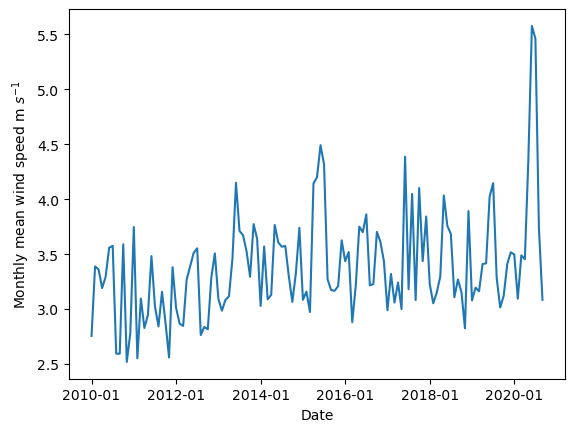

In [50]:
y = np.array(wspd.groupby(['YEAR','MONTH']).mean()['WSPD'])
x = np.arange(len(y))
slope, intercept = np.polyfit(x,y,1)
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Monthly mean wind speed m $s^{-1}$')
plt.xticks(np.arange(0,len(y),24),
           ['2010-01','2012-01','2014-01','2016-01','2018-01','2020-01'])
print(slope)

Since the slope is large than 0, the trend of wind speed is increasing at a rate of 0.0048 m $s^{-1}$ every month

# 3

Dataset chosen: Global Summary of the Year (GSOY) of NCEI, Version 1.  
Station chosen: Guangzhou, China, CHM00059287  
Varible chosen: Total annual precipitation (PRCP) in millimeters

## 3.1

In [16]:
gsoy = pd.read_csv(r'D:\Sustech\研究生\课程\Environmental programming\ESE5023_Assignments_12232269\Assignment 02\CHM00059287.csv',sep=',')
gsoy = gsoy[['DATE','PRCP']]
gsoy = gsoy[gsoy['DATE'] <= 2012]
gsoy

,DATE,PRCP
0,1951,1880.0
1,1952,1737.4
2,1953,2027.2
3,1954,1689.4
4,1955,1923.4
...,...,...
57,2008,2284.0
58,2009,1472.6
59,2010,2353.6
60,2011,1632.3


## 3.2

Text(0, 0.5, 'Annual precipitation (mm)')

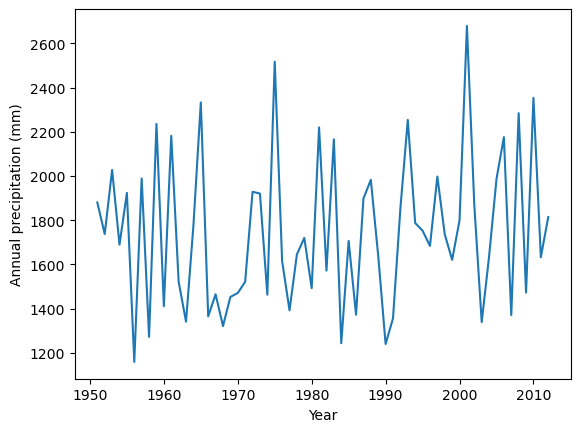

In [17]:
plt.plot(gsoy['DATE'],gsoy['PRCP'])
plt.xlabel('Year')
plt.ylabel('Annual precipitation (mm)')

## 3.3

In [19]:
slo, intc = np.polyfit(gsoy['DATE'],gsoy['PRCP'],1)
print(slo)
slo_1, intc_1 = np.polyfit(gsoy['DATE'][0:31],gsoy['PRCP'][0:31],1)
print(slo_1)
slo_2, intc_2 = np.polyfit(gsoy['DATE'][31:62],gsoy['PRCP'][31:62],1)
print(slo_2)
print(gsoy['PRCP'].std())
print(gsoy['PRCP'].mean())

2.76180403414675
-0.7751612903229318
8.606854838709594
346.2833497408931
1745.8806451612904


Findings:  
1.The annual precipitation is increasing at a rate of 2.76 mm per year during 1951-2012.  
2.The increasing trend is mainly due to the increasing in the recent 31 years, as the first 31 years show decreasing trend and the recent 31 years is increasing at a rate of 8.61 mm per year.  
3.The mean annual precipitation is 1745.88 mm, indicating a rainy station.  
4.The standard deviation is 346.28 mm, so the changing of the precipitation is drastic.